In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle

In [18]:
df = pd.read_csv('BindingDBSmall.csv')

C:\Users\herutriana44\AppData\Local\Temp\ipykernel_15168\1222468702.py:1: DtypeWarning: Columns (4,6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('BindingDBSmall.csv')


In [19]:
df.dtypes

level_0                              int64
index                                int64
Ligand SMILES                       object
Ligand InChI                        object
Ki (nM)                             object
IC50 (nM)                           object
Kd (nM)                             object
EC50 (nM)                           object
kon (M-1-s-1)                      float64
koff (s-1)                         float64
pH                                 float64
Temp (C)                            object
BindingDB Target Chain Sequence     object
Center Of Mass Ligand              float64
Ligand Weight                      float64
Target SMILES                       object
Target Weight                      float64
Center Of Mass Target              float64
Distance                           float64
dtype: object

In [20]:
col_used = ['Center Of Mass Ligand', 'Ligand Weight', 'Target Weight', 'Center Of Mass Target', 'Distance','Ki (nM)']
for i in col_used:
    df = df.dropna(subset=i)

del df['level_0']
df = df.reset_index()

In [21]:
import string

def remove_symbols(input_string, symbols_to_remove):
    """
    Menghapus simbol-simbol yang ditentukan dari input string.

    Parameters:
    input_string (str): String asal.
    symbols_to_remove (str): Simbol-simbol yang ingin dihapus.

    Returns:
    str: String hasil setelah simbol-simbol dihapus.
    """
    # Menggunakan str.maketrans untuk membuat tabel untuk translate
    translation_table = str.maketrans("", "", symbols_to_remove)
    
    # Menghapus simbol-simbol yang diinginkan
    cleaned_string = input_string.translate(translation_table)
    
    return cleaned_string

In [22]:
df['Ki (nM)'] = [float(remove_symbols(str(df['Ki (nM)'][i]), string.punctuation)) for i in range(len(df))]

In [28]:
df.describe()

,level_0,index,Ki (nM),kon (M-1-s-1),koff (s-1),pH,Center Of Mass Ligand,Ligand Weight,Target Weight,Center Of Mass Target,Distance
count,5464.000000,5.464000e+03,5464.000000,0.0,0.0,77.000000,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000
mean,31025.496340,1.014345e+06,7062.637262,NaN,NaN,6.189610,-0.451362,490.438447,72852.605016,325.525033,325.976396
std,23428.177977,2.807744e+05,29590.225423,NaN,NaN,0.764566,0.711902,108.835957,100933.823160,450.674113,450.665032
min,0.000000,0.000000e+00,0.000000,NaN,NaN,4.700000,-2.985610,206.285000,4036.624000,19.485091,18.574535
25%,9071.750000,1.083997e+06,100.000000,NaN,NaN,5.500000,-0.950656,416.497250,37385.506000,179.451892,179.514788
50%,24237.500000,1.095150e+06,270.000000,NaN,NaN,6.250000,-0.468152,474.584000,47600.189000,212.724255,213.690345
75%,55673.250000,1.103763e+06,1400.000000,NaN,NaN,6.250000,0.010972,553.630000,71466.206000,319.174109,320.569729
max,66664.000000,1.137712e+06,827400.000000,NaN,NaN,7.600000,1.861160,1123.677000,795182.351000,3558.143099,3560.225764


In [38]:
X = df[['Center Of Mass Ligand', 'Ligand Weight', 'Target Weight', 'Center Of Mass Target', 'Distance']]
# X = df['Distance']
y = df['Ki (nM)']

In [39]:
# # Standardize the features (X) to have mean=0 and variance=1
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [40]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model: Linear Regression
Mean Squared Error: 664663203.0602657
R-squared: 0.02125076690640304


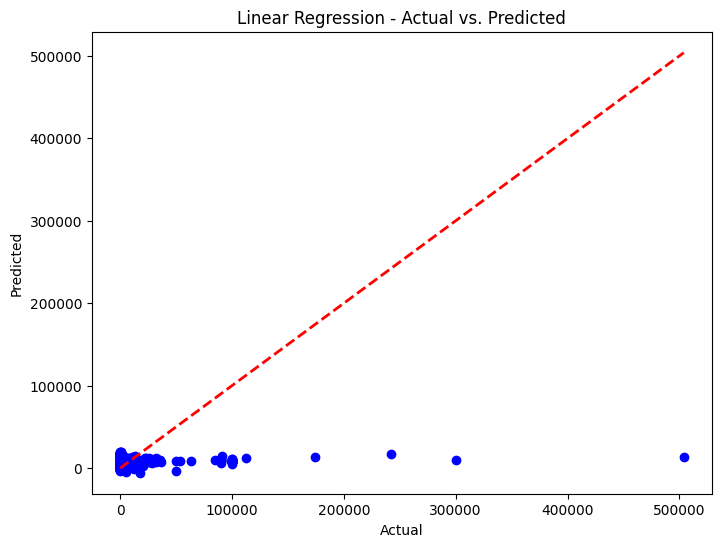

Model saved as 'Linear_Regression_Model.pkl'

Model: Ridge Regression
Mean Squared Error: 664663017.2221452
R-squared: 0.021251040562168977


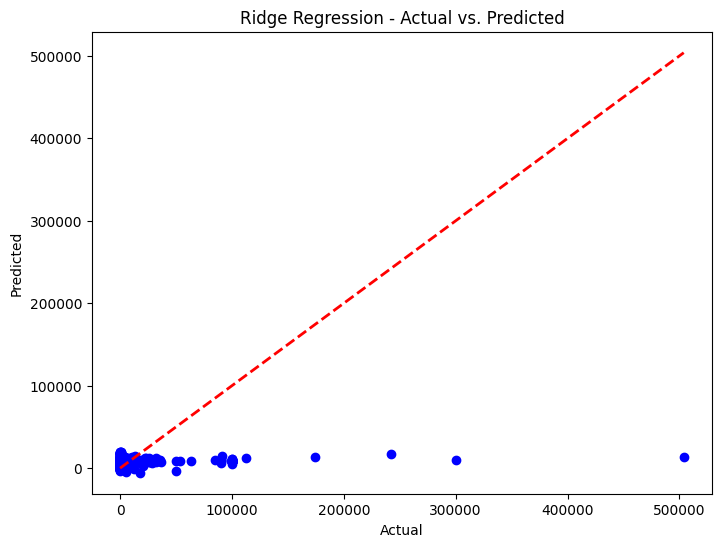

Model saved as 'Ridge_Regression_Model.pkl'


c:\Users\herutriana44\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.002e+12, tolerance: 4.040e+08
  model = cd_fast.enet_coordinate_descent(



Model: Lasso Regression
Mean Squared Error: 665480961.4408199
R-squared: 0.02004657750019223


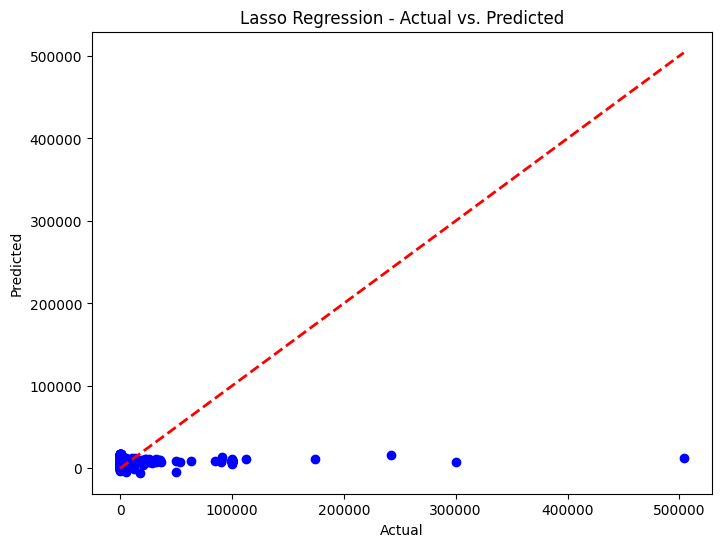

Model saved as 'Lasso_Regression_Model.pkl'

Model: K Neighbors Regressor
Mean Squared Error: 561239511.2351328
R-squared: 0.1735472361429874


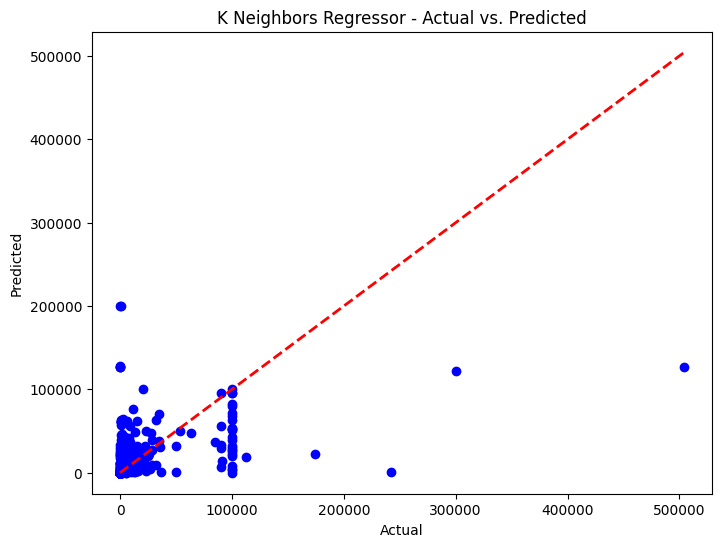

Model saved as 'K_Neighbors_Regressor_Model.pkl'

Model: Decision Tree Regressor
Mean Squared Error: 1474929705.5721257
R-squared: -1.171906480679345


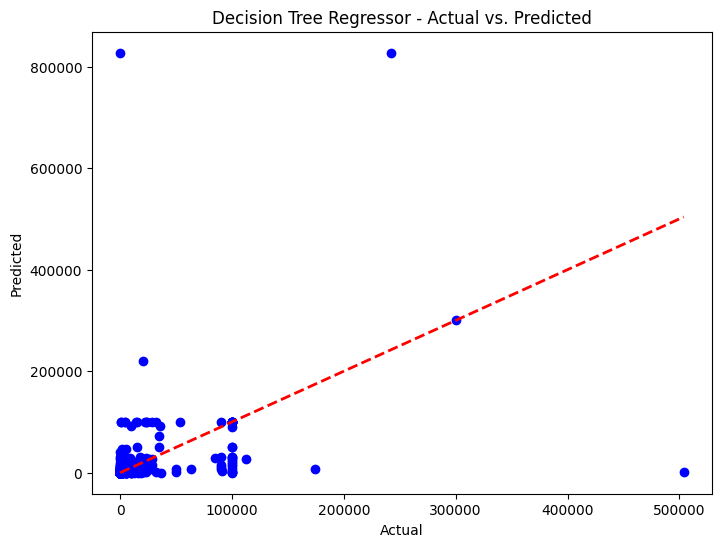

Model saved as 'Decision_Tree_Regressor_Model.pkl'

Model: Random Forest Regressor
Mean Squared Error: 720699907.5731546
R-squared: -0.06126603455719426


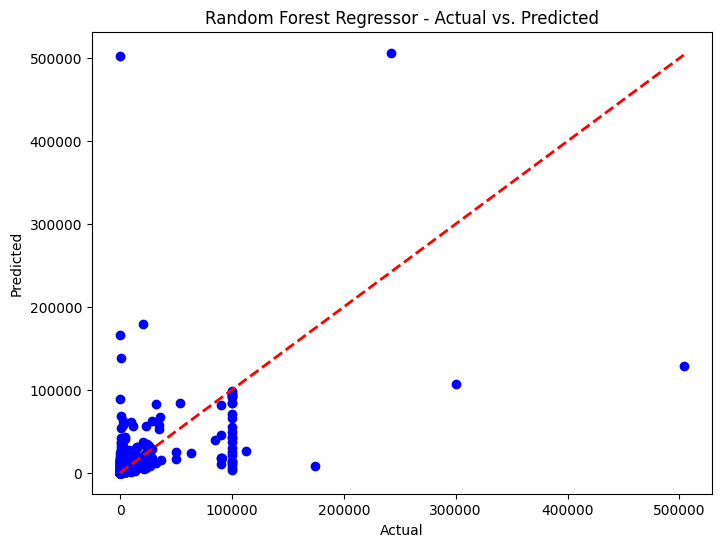

Model saved as 'Random_Forest_Regressor_Model.pkl'

Model: Gradient Boosting Regressor
Mean Squared Error: 858430528.8541954
R-squared: -0.26408114352013223


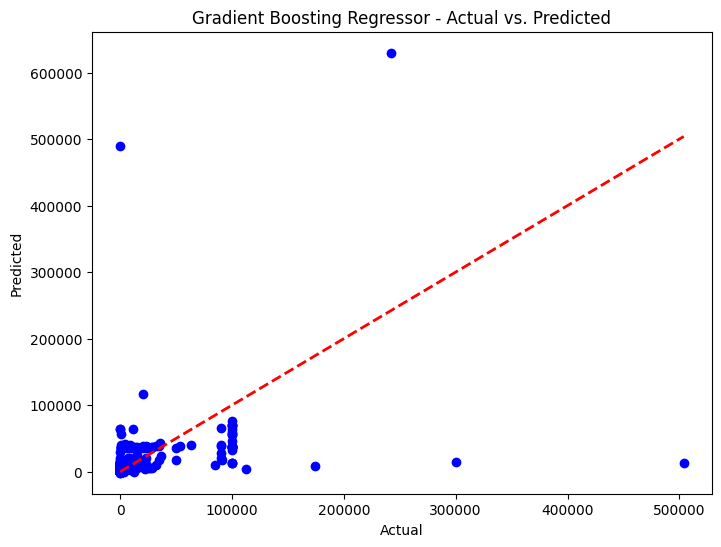

Model saved as 'Gradient_Boosting_Regressor_Model.pkl'

Model: Adaboost Regressor
Mean Squared Error: 10964212453.821735
R-squared: -15.145341702751487


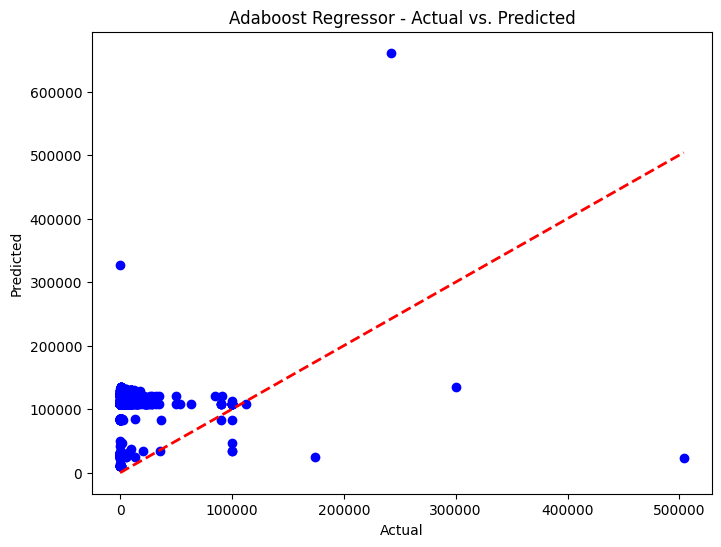

Model saved as 'Adaboost_Regressor_Model.pkl'


In [41]:
# List of regression models to train and evaluate
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'K Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Adaboost Regressor': AdaBoostRegressor()
}

# Train and evaluate each regression model
for model_name, model in regression_models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\nModel: {model_name}")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    
    # Visualize actual vs. predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_name} - Actual vs. Predicted')
    plt.show()
    
    # Save the model to a pickle file
    model_filename = f"{model_name.replace(' ', '_')}_Model.pkl"
    with open(model_filename, 'wb') as model_file:
        pickle.dump(model, model_file)
    print(f"Model saved as '{model_filename}'")

In [42]:
# Inisialisasi dan melatih model dengan Gradient Boosting Regressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [43]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

In [44]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 858430528.8541954
R-squared: -0.26408114352013223


In [46]:
# Simpan model ke dalam file pickle
with open('GradientBoostingRegressorScoringFunction.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model saved as 'model.pkl'")

Model saved as 'model.pkl'
